MULTILINEAR REGRESSION FRAMEWORK FOR TRAIN/TEST

In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, datasets, linear_model
from sklearn.model_selection import train_test_split, KFold


In [2]:
training = pd.read_csv('../data/train_clean.csv', index_col=0)
training.shape

(1437, 17)

In [3]:
#Convert year building was builtinto a numeric Age 
training['Age'] = 2019 - training['YearBuilt']


In [66]:
# normalizes dataframes using preprocessing from sklearn

# def make_normal(df):
#     new_dict = {}
#     cols = df.columns
#     for name in cols: 
#         key = 'norm_' + name
#         arr = np.array(df[name])
#         value = preprocessing.normalize([arr])      
#         new_dict[key] = value[0] 
#     return pd.DataFrame(new_dict)
    

In [74]:
# normalizes dataframes with math
def make_normal(df):
    new_dict = {}
    cols = df.columns
    for name in cols: 
        key = 'norm_' + name
        arr = np.array(df[name])
        upper = arr.max()
        lower = arr.min()
        value = (arr-lower)/(upper-lower)
        new_dict[key] = value
     
    return pd.DataFrame(new_dict)


In [81]:
# sigmoid

def sigmoid(df):
    new_dict = {}
    cols = df.columns
    for name in cols: 
        key = 'sig_' + name
        arr = np.array(df[name])
        e = np.exp(1)
        value = 1/(1+e**(arr))
        new_dict[key] = value
    return pd.DataFrame(new_dict)


In [84]:
def make_log(df):
    new_dict = {}
    cols = df.columns
    for name in cols: 
        key = 'log_' + name
        arr = np.array(df[name])
        value = np.log(arr + 1)
        new_dict[key] = value
     
    return pd.DataFrame(new_dict)



,norm_log_SalePrice
count,1424.000000
mean,0.495731
std,0.129744
min,0.000000
25%,0.411989
50%,0.487602
75%,0.577800
max,1.000000


In [5]:
# Make continuous features normal. Return normed df
norm_list = ['LotArea', 'Age', 'GrLivArea', 'GarageArea']
norm_df = training[norm_list]

norm_df = make_normal(norm_df)

In [6]:
# Mutates main df. Drops un-normed continuous values
training = training.drop(norm_list, axis=1)

In [7]:
# Mutates main df. Removes ordinal years. Keeps as subset years_df
years_df = training[['YearBuilt', 'YearRemodAdd']]
training = training.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

In [8]:
# Mutates main df. Adds normed values
training = pd.concat([training, norm_df], axis = 1)

In [9]:
training.sample(5) # for inspection. This df will be used for training/testing

,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,GarageType,SalePrice,Kitchen,Fireplace,ExterQ,BsmtQ,HeatingQ,n_toilets,n_showers,norm_LotArea,norm_Age,norm_GrLivArea,norm_GarageArea
430,0.0,3.0,1.0,1.0,181000.0,3.0,3.0,3.0,4.0,5.0,3.0,2.0,0.010423,0.049756,0.009025,0.017988
280,0.0,3.0,1.0,1.0,244600.0,4.0,4.0,4.0,4.0,5.0,2.0,2.0,0.010353,0.006102,0.016255,0.026981
817,0.0,3.0,1.0,1.0,232600.0,4.0,4.0,4.0,4.0,5.0,2.0,2.0,0.019179,0.027225,0.014877,0.023302
640,1.0,3.0,1.0,1.0,143250.0,3.0,0.0,3.0,3.0,3.0,3.0,2.0,0.025133,0.053042,0.019103,0.011038
24,1.0,3.0,1.0,1.0,154000.0,4.0,3.0,3.0,3.0,5.0,2.0,2.0,0.020082,0.023939,0.022471,0.013797


In [10]:
norm_list = ['norm_'+x for x in norm_list]

In [12]:
training = training.dropna()
training.shape

(1424, 16)

In [50]:
# Remove "SalePrice column from train_x"
y = training['SalePrice']
X = training.drop('SalePrice', axis=1)

In [55]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)


In [59]:
#Multilinear - Simple -- Unpenalized model i.e. lambda = 0
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

print("Intercept: %f" %ols.intercept_)
for i in range(len(X.columns)):
    print("Coefficient: %s : %s" %(ols.coef_[i], list(X.columns)[i]))
print("R^2: %f" %(ols.score(X_train, y_train)))

predictions = ols.predict(X)
ols.score(X_train,y_train)


Intercept: -167295.624809
Coefficient: -6832.095257449038 : BsmtFullBath
Coefficient: 9131.504197065846 : BedroomAbvGr
Coefficient: -6352.579455539479 : KitchenAbvGr
Coefficient: 1326.8525931377133 : GarageType
Coefficient: 22757.01231655067 : Kitchen
Coefficient: 9292.239151508284 : Fireplace
Coefficient: 36680.76420705245 : ExterQ
Coefficient: 13162.692534377547 : BsmtQ
Coefficient: 1494.0336202853953 : HeatingQ
Coefficient: 15172.249568566242 : n_toilets
Coefficient: 14105.019171478614 : n_showers
Coefficient: 3136.6226917203894 : norm_LotArea
Coefficient: -64022.3881384693 : norm_Age
Coefficient: -84897.34432361068 : norm_GrLivArea
Coefficient: -154752.87486523372 : norm_GarageArea
R^2: 0.704855


0.7048551289159072

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

LASSO REGRESSION / COEFFICIENT ESTIMATES AT DIFFERENT ALPHA LEVELS

In [60]:
lasso  = Lasso()
alphas = np.linspace(0.1,0.9,20)
lasso.set_params(normalize=False)
coefs_lasso  = []
intercepts_lasso = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)  
    coefs_lasso.append(lasso.coef_)
    intercepts_lasso.append(lasso.intercept_)
        
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)  
coefs_lasso.head(10)

,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,GarageType,Kitchen,Fireplace,ExterQ,BsmtQ,HeatingQ,n_toilets,n_showers,norm_LotArea,norm_Age,norm_GrLivArea,norm_GarageArea
0.100000,-6831.516248,9131.943299,-6349.719110,1328.240072,22759.385884,9291.247412,36677.912418,13163.802781,1495.900854,15176.089814,14099.542688,1349.350174,-62504.055174,-82990.869471,-153131.371412
0.142105,-6831.270773,9132.130552,-6348.513875,1328.820483,22760.386089,9290.830246,36676.711462,13164.272372,1496.687083,15177.698472,14097.242017,596.848726,-61864.776248,-82188.190079,-152448.630542
0.184211,-6831.028703,9132.264050,-6347.424083,1329.261894,22761.249489,9290.441806,36675.566036,13164.768443,1497.331623,15179.071030,14095.312824,0.000000,-61253.470683,-81450.011923,-151805.032261
0.226316,-6830.833252,9132.175861,-6346.809580,1329.183900,22761.587246,9290.160932,36674.633189,13165.350055,1497.426826,15179.565802,14094.813791,0.000000,-60749.534968,-80958.914095,-151311.680178
0.268421,-6830.637801,9132.087673,-6346.195078,1329.105907,22761.925003,9289.880057,36673.700342,13165.931666,1497.522029,15180.060573,14094.314758,0.000000,-60245.599253,-80467.816267,-150818.328094
0.310526,-6830.442350,9131.999484,-6345.580575,1329.027913,22762.262760,9289.599183,36672.767495,13166.513278,1497.617232,15180.555345,14093.815725,0.000000,-59741.663538,-79976.718439,-150324.976010
0.352632,-6830.226697,9131.923251,-6344.947623,1328.935690,22762.602379,9289.320327,36671.834168,13167.106975,1497.715526,15181.020896,14093.323664,0.000000,-59237.752715,-79485.747489,-149831.582096
0.394737,-6830.031246,9131.835059,-6344.333119,1328.857701,22762.940135,9289.039452,36670.901322,13167.688585,1497.810730,15181.515680,14092.824621,-0.000000,-58733.816987,-78994.649608,-149338.230037
0.436842,-6829.835794,9131.746868,-6343.718614,1328.779713,22763.277890,9288.758577,36669.968475,13168.270195,1497.905933,15182.010464,14092.325578,-0.000000,-58229.881258,-78503.551726,-148844.877979
0.478947,-6829.640342,9131.658677,-6343.104110,1328.701724,22763.615645,9288.477702,36669.035628,13168.851804,1498.001137,15182.505247,14091.826535,-0.000000,-57725.945530,-78012.453845,-148351.525920


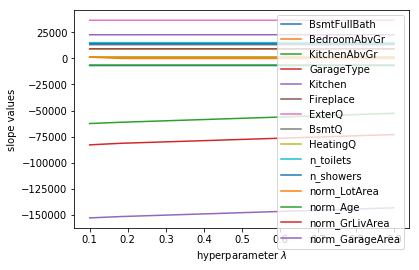

In [61]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

plt.legend()   

In [19]:
ridge = Ridge() # create a ridge regression instance
ridge.set_params(normalize=False)
ridge.fit(X_train, y_train) # fit data
ridge.coef_, ridge.intercept_ # print out the coefficients
print("The coef of determination of ridge regression is: %.4f" %ridge.score(train_x, train_y))

The coef of determination of ridge regression is: 0.7039


In [63]:
ridge_scores_train = []
ridge_scores_test = []
lasso_scores_train = []
lasso_scores_test = []


alphas = np.logspace(-2, 3, 10)

for alpha in alphas:
    ridge.set_params(alpha=alpha, normalize=False)
    lasso.set_params(alpha=alpha, normalize=False)
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    print(ridge.score(X_train,y_train))
    ridge_scores_train.append(ridge.score(X_train, y_train))
    ridge_scores_test.append(ridge.score(X_test, y_test))
    lasso_scores_train.append(lasso.score(X_train, y_train))
    lasso_scores_test.append(lasso.score(X_test, y_test))
    
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

0.7048486428571673
0.704809064406523
0.7046829391815446
0.7045030410753579
0.7043707983931131
0.7042712833933542
0.7037999142762271
0.7004178297656247
0.6834701227562852
0.6225388113908767


array([0.70484864, 0.70480906, 0.70468294, 0.70450304, 0.7043708 ,
       0.70427128, 0.70379991, 0.70041783, 0.68347012, 0.62253881])

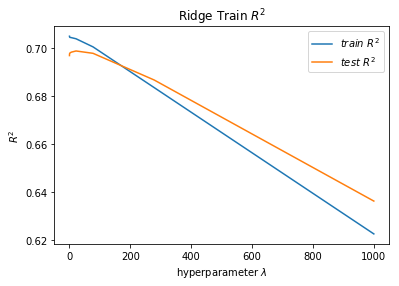

In [64]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train $R^2$')

plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
ridge_scores_train

Text(0,0.5,'$R^2$')

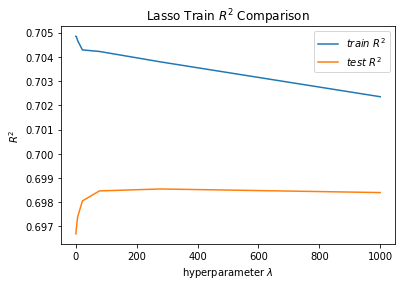

In [65]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train $R^2$ Comparison')

plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [23]:
lasso_scores_train

array([0.70410087, 0.70410086, 0.70410068, 0.70409844, 0.7040751 ,
       0.7039592 , 0.70385885, 0.70380161, 0.70330464, 0.70197924])

In [24]:
ridge_scores_train

array([0.7040985 , 0.70408199, 0.7040226 , 0.70394235, 0.70389066,
       0.7038499 , 0.70362014, 0.7017344 , 0.69091292, 0.6496845 ])